In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_weather = pd.read_csv('weatherHistory.csv')
df_weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
print(f'Total number of observations {df_weather.shape[0]}')
df_weather.nunique()

Total number of observations 96453


Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [4]:
for column in df_weather.columns:
    print(f'{column}: {df_weather[column].count()}')
    print(df_weather[column].isnull().any())

Formatted Date: 96453
False
Summary: 96453
False
Precip Type: 95936
True
Temperature (C): 96453
False
Apparent Temperature (C): 96453
False
Humidity: 96453
False
Wind Speed (km/h): 96453
False
Wind Bearing (degrees): 96453
False
Visibility (km): 96453
False
Loud Cover: 96453
False
Pressure (millibars): 96453
False
Daily Summary: 96453
False


In [5]:
df_weather['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [6]:
df_weather['Precip Type'] = df_weather['Precip Type'].fillna('rain')

In [7]:
for column in df_weather.columns:
    print(f'{column}: {df_weather[column].count()}')
    print(df_weather[column].isnull().any())

Formatted Date: 96453
False
Summary: 96453
False
Precip Type: 96453
False
Temperature (C): 96453
False
Apparent Temperature (C): 96453
False
Humidity: 96453
False
Wind Speed (km/h): 96453
False
Wind Bearing (degrees): 96453
False
Visibility (km): 96453
False
Loud Cover: 96453
False
Pressure (millibars): 96453
False
Daily Summary: 96453
False


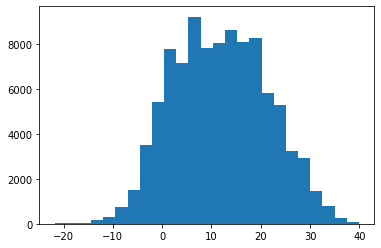

In [8]:
ax = plt.axes()
ax.hist(df_weather['Temperature (C)'], bins=25);

In [9]:
df_weather['Temperature (C)'].describe()

count    96453.000000
mean        11.932678
std          9.551546
min        -21.822222
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

In [9]:
df_weather[log_columns] = df_weather[log_columns].apply(np.log1p)

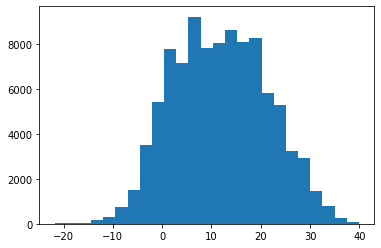

In [11]:
ax = plt.axes()
ax.hist(df_weather['Temperature (C)'], bins=25);

In [12]:
df_weather['Temperature (C)'].describe()

count    96453.000000
mean        11.932678
std          9.551546
min        -21.822222
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

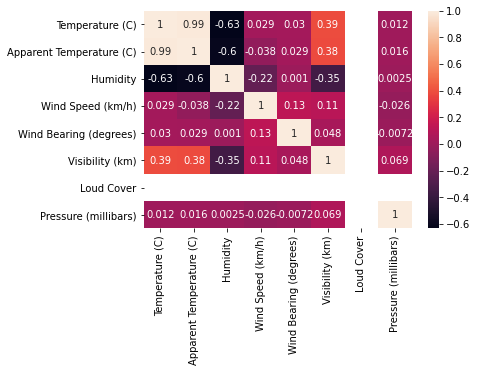

In [13]:
heatmap = sns.heatmap(df_weather. corr(), annot=True)

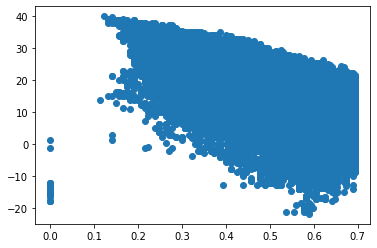

In [14]:
ax = plt.axes()
ax.scatter(y = df_weather['Temperature (C)'], x = df_weather['Humidity'])

### Statement 1 - Does precipitation play significant role in predicting temperature?

### Null Hypothesis: There is no significant difference between the mean temperature on rainy and non-rainy days

### Alternate Hypothesis: There is a significant difference between the mean temperature on rainy and non-rainy days

In [10]:
M_mean = df_weather.loc[df_weather['Precip Type'] == 'rain', 'Temperature (C)'].mean()
F_mean = df_weather.loc[df_weather['Precip Type'] == 'snow', 'Temperature (C)'].mean()
M_std = df_weather.loc[df_weather['Precip Type'] == 'rain', 'Temperature (C)'].std()
F_std = df_weather.loc[df_weather['Precip Type'] == 'snow', 'Temperature (C)'].std()
no_of_M = df_weather.loc[df_weather['Precip Type'] == 'rain', 'Temperature (C)'].count()
no_of_F = df_weather.loc[df_weather['Precip Type'] == 'snow', 'Temperature (C)'].count()

In [16]:
from scipy.stats import norm

In [17]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = np.sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z,3), pval
z,p= twoSampZ(M_mean,F_mean,0,M_std,F_std,no_of_M,no_of_F)
print(z, p)

416.38 0.0


In [41]:
import statsmodels.stats.weightstats as ws
    
col1 = ws.DescrStatsW(df_weather.loc[df_weather['Precip Type'] == 'rain', 'Temperature (C)'])
col2 = ws.DescrStatsW(df_weather.loc[df_weather['Precip Type'] == 'snow', 'Temperature (C)'])

cm_obj = ws.CompareMeans(col1, col2)

zstat, z_pval = cm_obj.ztest_ind(usevar='unequal')

print(zstat.round(3), z_pval.round(3))

416.38 0.0


In [43]:
from scipy.stats import ttest_ind

In [44]:
ttest_ind(df_weather.loc[df_weather['Precip Type'] == 'rain', 'Temperature (C)'],
          df_weather.loc[df_weather['Precip Type'] == 'snow', 'Temperature (C)'],
          equal_var = False
         )

Ttest_indResult(statistic=416.37958029244624, pvalue=0.0)

### Thus we can reject the null hypothesis; and retain the precipitation type feature

### Statement 2 - Does mean temperature varies significantly for different summaries?

### Null Hypothesis: There is no significant difference between the mean temperature among different summary group

### Alternate Hypothesis: There is significant difference between the mean temperature among different summary group

### Statement 3 - Does the temperature is normaly distributed?

### Null Hypothesis: The temperature is normally distributed

### Alternate Hypothesis: The temperature is not normally distributed

In [45]:
from scipy.stats.mstats import normaltest

In [46]:
normaltest(df_weather['Temperature (C)'].values)

NormaltestResult(statistic=2781.31464301078, pvalue=0.0)

In [26]:
normaltest(df_weather['Humidity'])

NormaltestResult(statistic=9869.911805254162, pvalue=0.0)

In [28]:
df_weather['Humidity'].values

array([0.63657683, 0.62057649, 0.63657683, ..., 0.44468582, 0.47000363,
       0.47623418])